Covid-19 Data Cleaning and Visualization

In [83]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [84]:
data = pd.read_csv("COVID19_Data.csv")

print(data.head())

  Data As Of Start Date   End Date     Group  Year  Month          State  \
0  9/27/2023   1/1/2020  9/23/2023  By Total   NaN    NaN  United States   
1  9/27/2023   1/1/2020  9/23/2023  By Total   NaN    NaN  United States   
2  9/27/2023   1/1/2020  9/23/2023  By Total   NaN    NaN  United States   
3  9/27/2023   1/1/2020  9/23/2023  By Total   NaN    NaN  United States   
4  9/27/2023   1/1/2020  9/23/2023  By Total   NaN    NaN  United States   

         Sex     Age Group  COVID-19 Deaths  Total Deaths  Pneumonia Deaths  \
0  All Sexes      All Ages        1146774.0    12303399.0         1162844.0   
1  All Sexes  Under 1 year            519.0       73213.0            1056.0   
2  All Sexes    0-17 years           1696.0      130970.0            2961.0   
3  All Sexes     1-4 years            285.0       14299.0             692.0   
4  All Sexes    5-14 years            509.0       22008.0             818.0   

   Pneumonia and COVID-19 Deaths  Influenza Deaths  \
0             

In [85]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137700 entries, 0 to 137699
Data columns (total 15 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Data As Of                                137700 non-null  object 
 1   Start Date                                137700 non-null  object 
 2   End Date                                  137700 non-null  object 
 3   Group                                     137700 non-null  object 
 4   Year                                      134946 non-null  float64
 5   Month                                     123930 non-null  float64
 6   State                                     137700 non-null  object 
 7   Sex                                       137700 non-null  object 
 8   Age Group                                 137700 non-null  object 
 9   COVID-19 Deaths                           98270 non-null   float64
 10  Total Deaths        

In [86]:
# Display missing values

print(data.isnull().sum())

Data As Of                                      0
Start Date                                      0
End Date                                        0
Group                                           0
Year                                         2754
Month                                       13770
State                                           0
Sex                                             0
Age Group                                       0
COVID-19 Deaths                             39430
Total Deaths                                19509
Pneumonia Deaths                            44864
Pneumonia and COVID-19 Deaths               36884
Influenza Deaths                            26688
Pneumonia, Influenza, or COVID-19 Deaths    44233
dtype: int64


##### Fill missing values

In [87]:
# Fill missing values for Year & Month with mode
data['Year'].fillna(data['Year'].mode()[0], inplace=True)
data['Month'].fillna(data['Month'].mode()[0], inplace=True)

# Fill missing numeric columns with 0
num_cols = ['COVID-19 Deaths', 'Total Deaths', 'Pneumonia Deaths', 
            'Pneumonia and COVID-19 Deaths', 'Influenza Deaths', 
            'Pneumonia, Influenza, or COVID-19 Deaths']
data[num_cols] = data[num_cols].fillna(0)

##### Convert Date column to Datetime format

In [88]:
# Convert to datetime format
data['Data As Of'] = pd.to_datetime(data['Data As Of'])
data['Start Date'] = pd.to_datetime(data['Start Date'])
data['End Date'] = pd.to_datetime(data['End Date'])

##### Fix data types for year and month

In [89]:
# Convert Year and Month to integers
data['Year'] = data['Year'].astype(int)
data['Month'] = data['Month'].astype(int)

In [90]:
# Check for duplicate rows
print("Duplicate Rows:", data.duplicated().sum())

Duplicate Rows: 0


#### Visualizaing Outliers Using Box plot

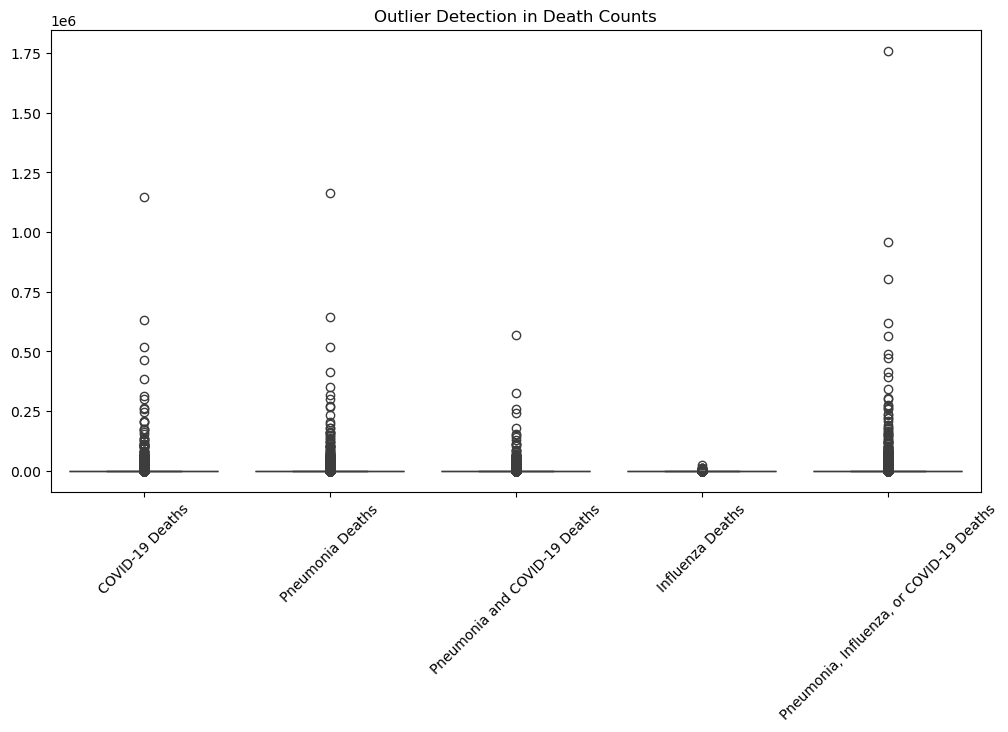

In [91]:
# Plot boxplots for numerical columns
death_cols = ['COVID-19 Deaths', 'Pneumonia Deaths', 'Pneumonia and COVID-19 Deaths',
            'Influenza Deaths', 'Pneumonia, Influenza, or COVID-19 Deaths']

plt.figure(figsize=(12, 6))
sns.boxplot(data=data[death_cols])
plt.xticks(rotation=45)
plt.title("Outlier Detection in Death Counts")
plt.show()

##### Detecting Outliers using Z score

In [43]:
# Calculate Z-score for COVID-19 Deaths
data['COVID-19 Deaths'] = stats.zscore(data['COVID-19 Deaths'].fillna(data['COVID-19 Deaths'].mean()))

# Define threshold for outliers
threshold = 3

# Identify outliers
data_outliers = data[data['COVID-19 Deaths'].abs() > threshold]

# Remove outliers
data_clean = data[data['COVID-19 Deaths'].abs() <= threshold]

# Drop the extra Z-score column after filtering
data_clean = data_clean.drop(columns=['COVID-19 Deaths'])

#### Removing outliers for all death related columns together

In [92]:
# List of death-related columns
death_columns = ['COVID-19 Deaths', 'Pneumonia Deaths', 
                 'Pneumonia and COVID-19 Deaths', 'Influenza Deaths', 
                 'Pneumonia, Influenza, or COVID-19 Deaths']

# For each death column
for col in death_columns:
    
# Calculate Z-score for each death-related column
    data[f'{col} Z'] = stats.zscore(data[col].fillna(data[col].mean()))
    
# Define threshold for outliers
threshold = 3
    
# Identify outliers
outliers = data[data[f'{col} Z'].abs() > threshold]

# Remove outliers
data_cleaned = data[data[f'{col} Z'].abs() <= threshold]


In [94]:
# Display the DataFrames for outliers and cleaned data
outliers, data_cleaned

(      Data As Of Start Date   End Date     Group  Year  Month          State  \
 0     2023-09-27 2020-01-01 2023-09-23  By Total  2020      1  United States   
 8     2023-09-27 2020-01-01 2023-09-23  By Total  2020      1  United States   
 9     2023-09-27 2020-01-01 2023-09-23  By Total  2020      1  United States   
 10    2023-09-27 2020-01-01 2023-09-23  By Total  2020      1  United States   
 11    2023-09-27 2020-01-01 2023-09-23  By Total  2020      1  United States   
 ...          ...        ...        ...       ...   ...    ...            ...   
 15300 2023-09-27 2022-07-01 2022-07-31  By Month  2022      7  United States   
 15351 2023-09-27 2022-08-01 2022-08-31  By Month  2022      8  United States   
 15504 2023-09-27 2022-11-01 2022-11-30  By Month  2022     11  United States   
 15555 2023-09-27 2022-12-01 2022-12-31  By Month  2022     12  United States   
 15606 2023-09-27 2023-01-01 2023-01-31  By Month  2023      1  United States   
 
              Sex    Age G

##### Save the CSV file

In [95]:
# Save the cleaned data to a new CSV file
data_cleaned.to_csv("COVID19_Cleaned_Data.csv", index=False)

------------------------------
------------------------------

#### Load the cleaned data for EDA

In [96]:
# Load the cleaned data
cleaned_data = pd.read_csv("COVID19_Cleaned_Data.csv")

# Display the first few rows of the cleaned data
print(cleaned_data.head(3))

   Data As Of  Start Date    End Date     Group  Year  Month          State  \
0  2023-09-27  2020-01-01  2023-09-23  By Total  2020      1  United States   
1  2023-09-27  2020-01-01  2023-09-23  By Total  2020      1  United States   
2  2023-09-27  2020-01-01  2023-09-23  By Total  2020      1  United States   

         Sex     Age Group  COVID-19 Deaths  Total Deaths  Pneumonia Deaths  \
0  All Sexes  Under 1 year            519.0       73213.0            1056.0   
1  All Sexes    0-17 years           1696.0      130970.0            2961.0   
2  All Sexes     1-4 years            285.0       14299.0             692.0   

   Pneumonia and COVID-19 Deaths  Influenza Deaths  \
0                           95.0              64.0   
1                          424.0             509.0   
2                           66.0             177.0   

   Pneumonia, Influenza, or COVID-19 Deaths  COVID-19 Deaths Z  \
0                                    1541.0           0.058294   
1                

In [97]:
# Check for any remaining missing values
print(cleaned_data.isnull().sum())

Data As Of                                    0
Start Date                                    0
End Date                                      0
Group                                         0
Year                                          0
Month                                         0
State                                         0
Sex                                           0
Age Group                                     0
COVID-19 Deaths                               0
Total Deaths                                  0
Pneumonia Deaths                              0
Pneumonia and COVID-19 Deaths                 0
Influenza Deaths                              0
Pneumonia, Influenza, or COVID-19 Deaths      0
COVID-19 Deaths Z                             0
Pneumonia Deaths Z                            0
Pneumonia and COVID-19 Deaths Z               0
Influenza Deaths Z                            0
Pneumonia, Influenza, or COVID-19 Deaths Z    0
dtype: int64


In [98]:
# Summary statistics for numerical columns
print(cleaned_data.describe())

                Year          Month  COVID-19 Deaths   Total Deaths  \
count  137451.000000  137451.000000    137451.000000  137451.000000   
mean     2021.381380       5.685968       118.456330    1419.495704   
std         1.093333       3.538765       690.929472    7730.031504   
min      2020.000000       1.000000         0.000000       0.000000   
25%      2020.000000       2.000000         0.000000      20.000000   
50%      2021.000000       6.000000         0.000000     101.000000   
75%      2022.000000       9.000000        23.000000     509.000000   
max      2023.000000      12.000000     20065.000000  332766.000000   

       Pneumonia Deaths  Pneumonia and COVID-19 Deaths  Influenza Deaths  \
count     137451.000000                  137451.000000     137451.000000   
mean         124.092186                      58.233778          2.243949   
std          683.398149                     357.818059         23.174767   
min            0.000000                       0.000000  

C:\Users\Jarshana Shrestha\AppData\Local\Temp\ipykernel_8064\608356307.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age Group',


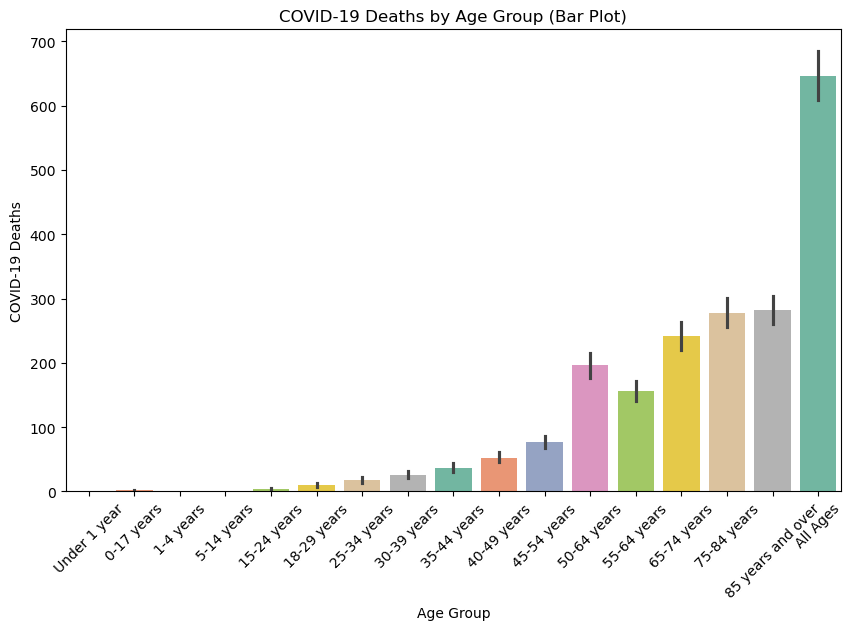

In [104]:
# Bar plot to show average COVID-19 Deaths by Age Group (Bar Plot)
plt.figure(figsize=(10, 6))
sns.barplot(x='Age Group', 
            y='COVID-19 Deaths', data=cleaned_data, palette='Set2')
plt.title('COVID-19 Deaths by Age Group (Bar Plot)')
plt.xlabel('Age Group')
plt.ylabel('COVID-19 Deaths')
plt.xticks(rotation=45)
plt.show()


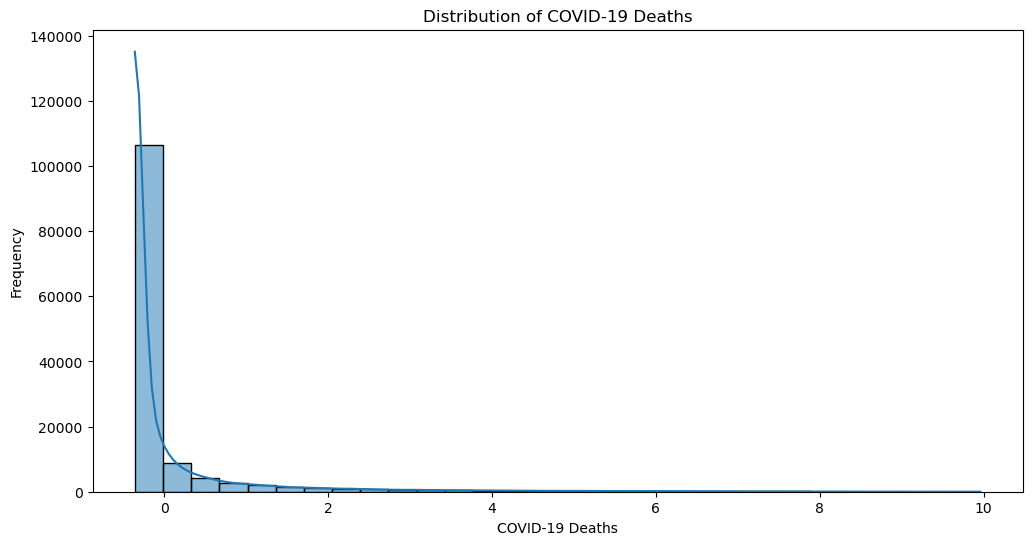

In [59]:
# Histogram for the distribution of COVID-19 Deaths
plt.figure(figsize=(12, 6))
sns.histplot(cleaned_data['COVID-19 Deaths'], bins=30, kde=True)
plt.title("Distribution of COVID-19 Deaths")
plt.xlabel("COVID-19 Deaths")
plt.ylabel("Frequency")
plt.show()

<Figure size 1200x800 with 0 Axes>

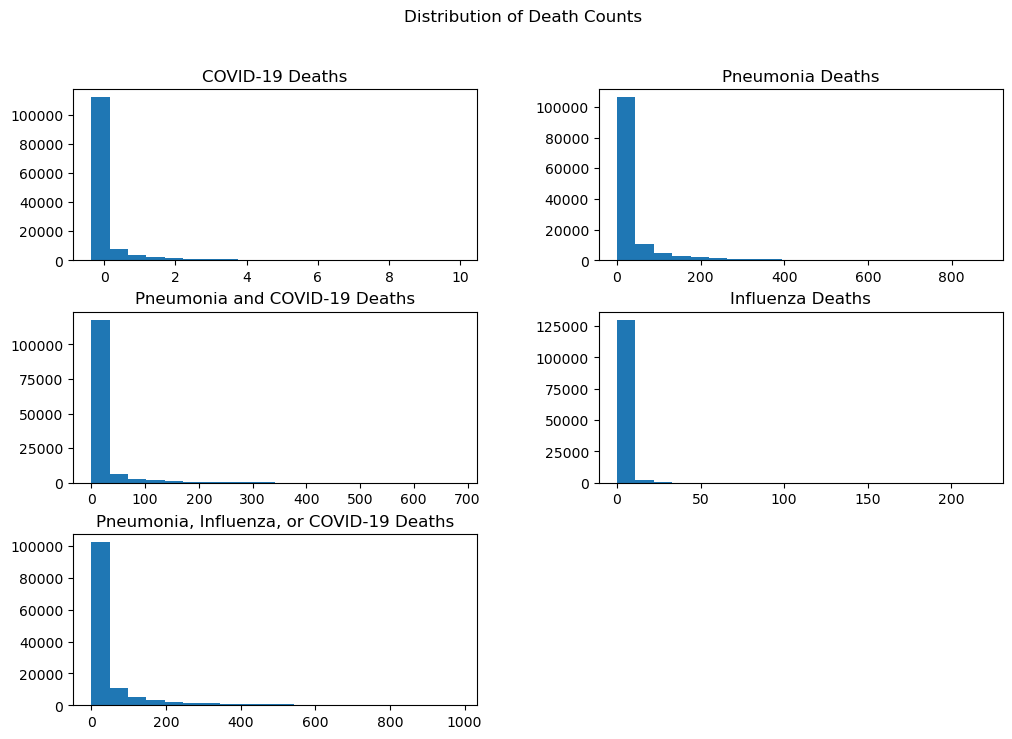

In [54]:
# Plot histograms for death columns

death_columns = ['COVID-19 Deaths', 'Pneumonia Deaths', 
                 'Pneumonia and COVID-19 Deaths', 'Influenza Deaths', 
                 'Pneumonia, Influenza, or COVID-19 Deaths']

plt.figure(figsize=(12, 8))
cleaned_data[death_columns].hist(bins=20, figsize=(12, 8), grid=False)
plt.suptitle('Distribution of Death Counts')
plt.show()


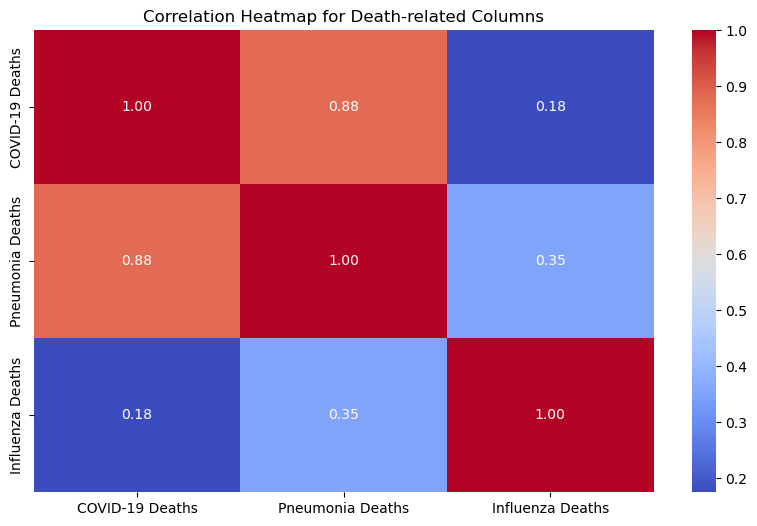

In [56]:
# Correlation heatmap
correlation_columns = ['COVID-19 Deaths', 'Pneumonia Deaths', 'Influenza Deaths']                

correlation_matrix = cleaned_data[correlation_columns].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap for Death-related Columns")
plt.show()


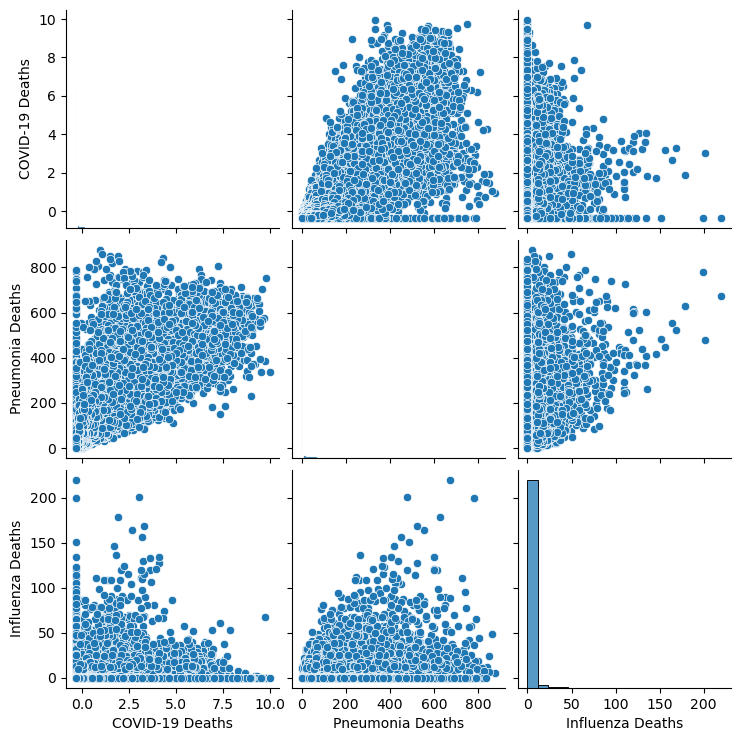

In [64]:
# Pairplot to visualize relationships between death-related columns

sns.pairplot(cleaned_data[correlation_columns])
plt.show()

----------

----------

#### Tableau Dashboard

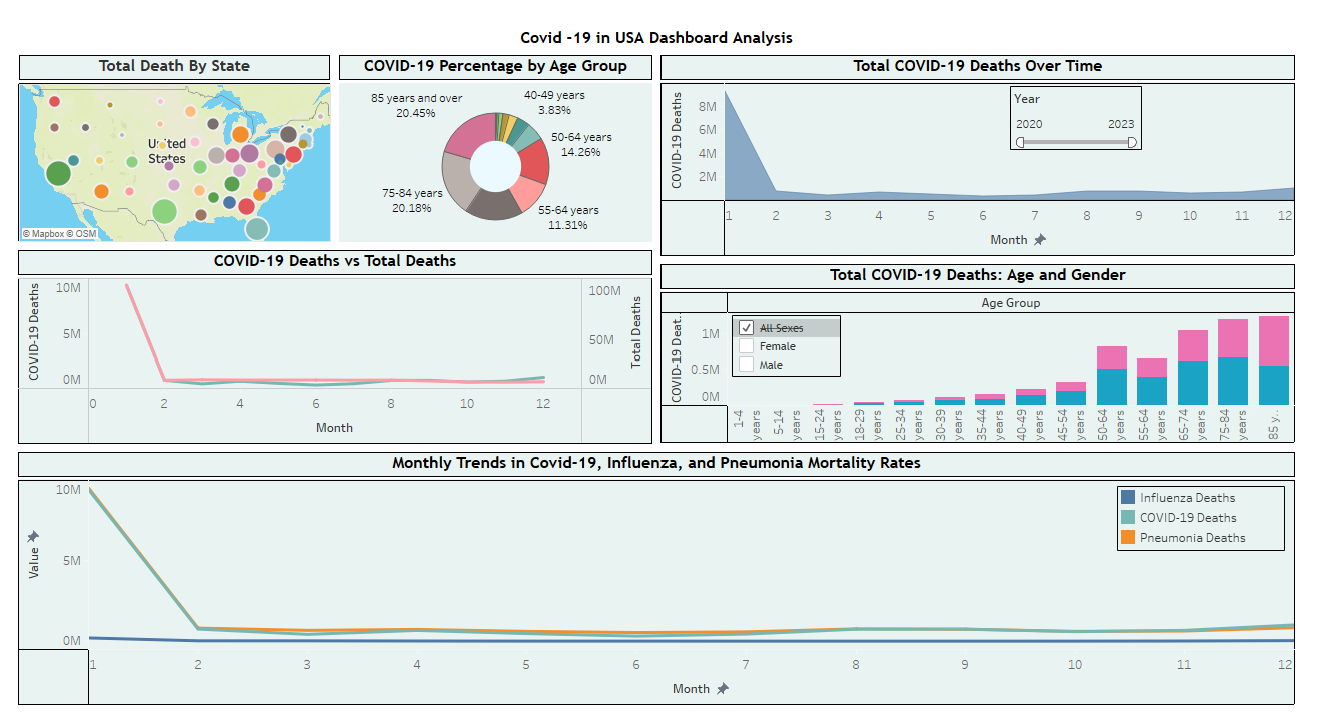